## MIE1624 Assignment 2

In [1]:
# General libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.ticker as ticker
from matplotlib.gridspec import GridSpec
try:
    import seaborn as sns
except:
    !pip install seaborn
    import seaborn as sns

# Libraries for feature engineering
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Libraries for model training
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [2]:
# Load the data
training = pd.read_csv('income-training.csv')

### 1. Data Cleaning
In this section, we perform some initial cleaning tasks, especially handling the missing values.

In [3]:
# Get the empty values in the data frame
nans = training[training.isnull().any(axis=1)]
nans

,Age,WorkClass,FinalWeight,Education,EducationLvl,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,IncomeBracket
9,65,NaN,137354,Some-college,10,Married-civ-spouse,NaN,Husband,Asian-Pac-Islander,Male,0,0,20,United-States,<50K
29,18,NaN,118847,HS-grad,9,Never-married,NaN,Own-child,White,Female,0,0,24,United-States,<50K
81,46,Private,268022,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,55,NaN,50-100K
88,28,Private,226891,Some-college,10,Never-married,Adm-clerical,Unmarried,Asian-Pac-Islander,Female,0,0,30,NaN,<50K
95,63,NaN,321403,9th,5,Separated,NaN,Not-in-family,Black,Male,0,0,40,United-States,<50K
107,49,NaN,227690,HS-grad,9,Divorced,NaN,Not-in-family,White,Female,0,0,40,United-States,<50K
125,31,Self-emp-not-inc,162551,12th,8,Married-civ-spouse,Sales,Wife,Asian-Pac-Islander,Female,0,0,50,NaN,<50K
150,31,NaN,26553,Bachelors,13,Married-civ-spouse,NaN,Wife,White,Female,0,0,25,United-States,>100K
154,17,NaN,297117,11th,7,Never-married,NaN,Own-child,White,Female,0,0,40,United-States,<50K
160,31,NaN,672412,11th,7,Separated,NaN,Not-in-family,Black,Male,0,0,40,United-States,<50K


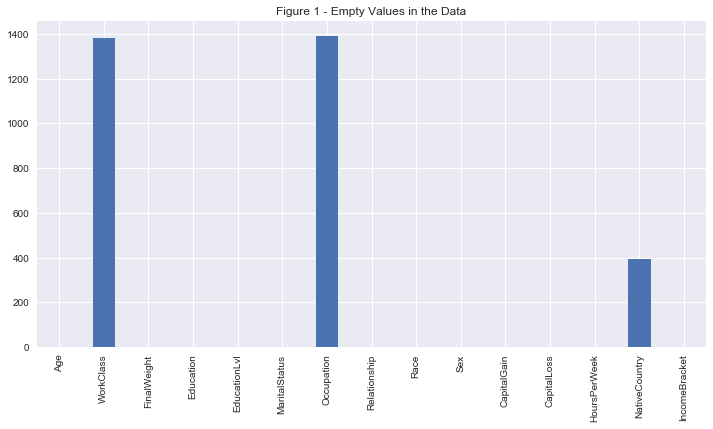

In [4]:
# Visualize the number of null values
number_of_nans = training.isnull().sum(axis=0)
number_of_nans.plot(kind='bar', figsize=(12,6), title='Figure 1 - Empty Values in the Data')

There are empty values in the Occupation column probably because some people were not emplyed when they did the survey. For the same reason, people don't fill in their work classes. We can see from the data frame that the NaNs usually appear in pairs in the WorkClass column and the Occupation column. It is also possible that people are reluctant to disclose their work class and/or occupation. In the above cases, it doesn't make sense to use the mode value of the dataset because those missing values don't follow the distribution of the rest.

There are also empty values in the NativeCountry column. This can be atributted to the fact that some people are conservative about their origin. Again, it doesn't make sense to replace them with the mode because usually people conceal their origins are from the minority countries.

In [5]:
# Eliminate the rows with null values
training = training[~training.isnull().any(axis=1)]
training

,Age,WorkClass,FinalWeight,Education,EducationLvl,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,IncomeBracket
0,42,State-gov,179151,Some-college,10,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,40,United-States,<50K
1,28,Private,68021,Some-college,10,Never-married,Other-service,Not-in-family,White,Female,0,0,30,United-States,<50K
2,24,Private,233499,Some-college,10,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,50-100K
3,32,Self-emp-not-inc,168782,9th,5,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,32,United-States,<50K
4,55,Self-emp-not-inc,105582,Masters,14,Married-civ-spouse,Sales,Husband,White,Male,2228,0,50,United-States,<50K
5,35,Private,261241,HS-grad,9,Divorced,Transport-moving,Not-in-family,White,Male,0,1741,60,United-States,<50K
6,51,Private,200576,Bachelors,13,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<50K
7,43,Self-emp-inc,175715,HS-grad,9,Never-married,Exec-managerial,Not-in-family,Black,Male,0,0,55,United-States,<50K
8,29,State-gov,188986,Assoc-voc,11,Never-married,Tech-support,Not-in-family,White,Female,0,1590,64,United-States,<50K
10,35,Private,241998,HS-grad,9,Never-married,Sales,Not-in-family,White,Male,4787,0,40,United-States,>100K


### 2. Exploratory Data Analysis
In this section, we plot some figures on the given data and do some exploratory analysis. We look at the trends of the target variable. We also calculate the correlations of every features pairs and the correlation between each feature and the target variable.

First, we look at how much proportion each income bracket takes up in the survey population.

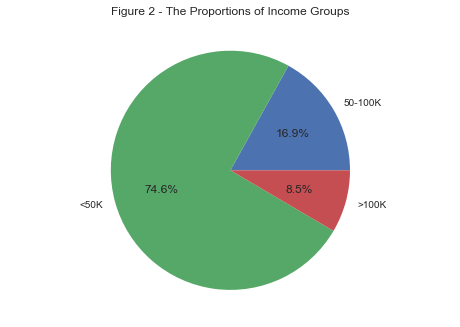

In [6]:
# Plot the proportion of each income bracket out of the survey population
counts = training.groupby(training.IncomeBracket).size()
plt.axis('equal');
plt.pie(counts, labels=counts.index, autopct='%1.1f%%');
plt.title('Figure 2 - The Proportions of Income Groups')
plt.show()

From this figure, we have a rough idea of what the income constituition is like in the survey population. The majority's incomes fall into the category of less than 50K. Only 8.5% of people in the survey earn more than 100K per year (I assume it is yearly income).

Then we take a further step to see if for participants with different genders, each income bracket still accounts for the same proportion.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x110661be0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x113c22518>], dtype=object)

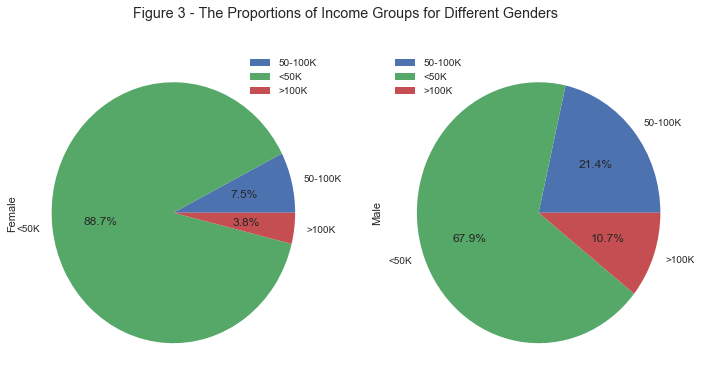

In [7]:
# Plot the proportion of each income bracket in each gender group
counts = training.groupby([training.Sex, training.IncomeBracket]).size()
counts.unstack(level=0).plot.pie(subplots=True, figsize=(12,6), autopct='%1.1f%%',
                                 title='Figure 3 - The Proportions of Income Groups for Different Genders')

We also visualize the constitution of each income group in terms of genders.

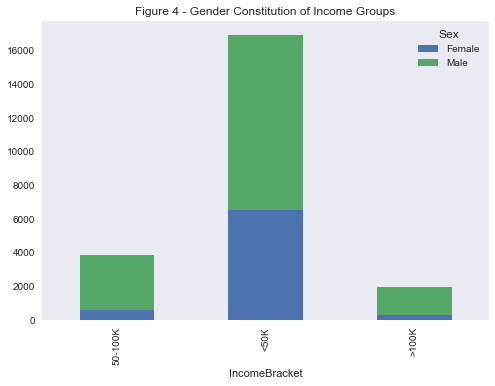

In [8]:
# Plot a bar chart to compare female and male population in each income bracket
var = training.groupby(['IncomeBracket','Sex']).size()
var.unstack().plot(kind='bar', stacked=True, grid=False)
plt.title('Figure 4 - Gender Constitution of Income Groups')

From the above pie chart, we can see that the majority of both male and female fall into the income bracket of less than 50K. However, a larger proportion of male participants fall into the income bracket of 50K-100K and >100K than that of female participants. This indicates that the gender of an individual may affect the income bracket of this individual. Thus, we want to keep this feature for model fitting.

The bar chart gives similar insights, while we can also see that there are obviously more male participants than female in this census.

Let's also look at the potential relation between age and income bracket.

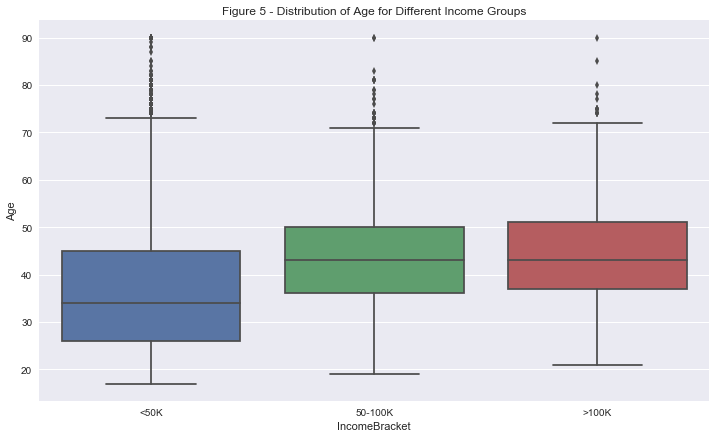

In [9]:
# Visualize the average age of each income bracket
plt.figure(figsize=(12,7))
ax = plt.axes()
sns.boxplot(x='IncomeBracket', y='Age', data=training)
ax.set_title('Figure 5 - Distribution of Age for Different Income Groups')
plt.show()

From the above figure, we know that the median age of the three income brackets are about 33, 42, 43 repectively. More generally, in the lowest income bracket, the majorities are younger than the other two income groups. The lowest income group also has a larger interquartile range than the others, which means that people in this income bracket have more various ages.

The two higher imcome groups have about the same median and about the same interquartile range. So it's more likely that age isn't the key factor that determins if you earn more than 100K or not.

Most data points above age 70 are marked as outliers in the boxplot, which are not necessarily true. There could be elderly people who live on government aid and don't have much income. Elderly people could also earn a lot of money by doing private businesses for instance.

Now we estimate the probability density functions of age for the three income groups.

/Users/angela/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


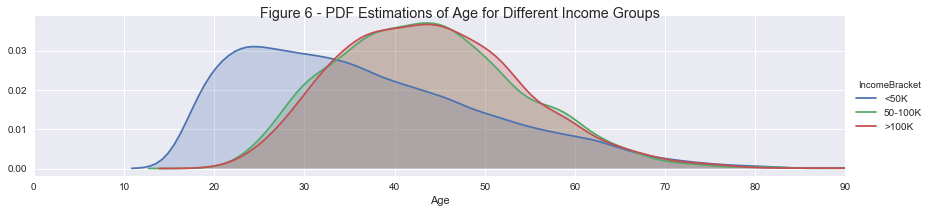

In [10]:
# Kernel density estimation plot of age
facet = sns.FacetGrid(training, hue='IncomeBracket', aspect=4)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0, training['Age'].max()))
facet.add_legend()
facet.fig.suptitle("Figure 6 - PDF Estimations of Age for Different Income Groups")

Clearly, the curve for less than 50K is right skewed. The income of a person aged under 20 is very likely to be less than 50K (as the area under the less than 50K curve in [0, 20] is much larger). When you are above the age of 35, the probabilty to earn more than 50K becomes higher.

In a similar way, we can plot the PDF estimation for different weekly working hours.

/Users/angela/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


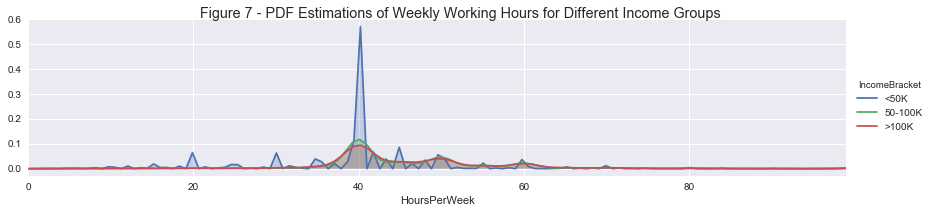

In [11]:
# Kernel density estimation plot of working hours per week
facet = sns.FacetGrid(training, hue='IncomeBracket', aspect=4)
facet.map(sns.kdeplot, 'HoursPerWeek', shade=True)
facet.set(xlim=(0, training['HoursPerWeek'].max()))
facet.add_legend()
facet.fig.suptitle("Figure 7 - PDF Estimations of Weekly Working Hours for Different Income Groups")

People in all three income groups are more likely to work 40 hours per week. This is because the standard working hours is so. Thus, this arrtibute might not be so indicative of the target.

Now we look at the correlation of each feature and the target, as well as the correlation of each feature pairs. The former tells us how Strongly the feature is related to the target, while the latter indicates whether two features convey similar information and one of them is redundant. To calculate the correlations, we first need to convert the categorical data into numerical data.

First we convert the target variable into numerical data in the following manner.

|  orignal value  |  new value
|  :-----------:  |  :------:
|     <50K        |     0
|    50-100K      |     1
|     >100K       |     2

This makes sense because the larger the new value is, the larger income level it represents

In [12]:
# Convert the target variable into numerical variable
dic = {"<50K": 0, "50-100K": 1, ">100K": 2}
training['IncomeBracket'] = training['IncomeBracket'].map(dic)
training

,Age,WorkClass,FinalWeight,Education,EducationLvl,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,IncomeBracket
0,42,State-gov,179151,Some-college,10,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,40,United-States,0
1,28,Private,68021,Some-college,10,Never-married,Other-service,Not-in-family,White,Female,0,0,30,United-States,0
2,24,Private,233499,Some-college,10,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,1
3,32,Self-emp-not-inc,168782,9th,5,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,32,United-States,0
4,55,Self-emp-not-inc,105582,Masters,14,Married-civ-spouse,Sales,Husband,White,Male,2228,0,50,United-States,0
5,35,Private,261241,HS-grad,9,Divorced,Transport-moving,Not-in-family,White,Male,0,1741,60,United-States,0
6,51,Private,200576,Bachelors,13,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,0
7,43,Self-emp-inc,175715,HS-grad,9,Never-married,Exec-managerial,Not-in-family,Black,Male,0,0,55,United-States,0
8,29,State-gov,188986,Assoc-voc,11,Never-married,Tech-support,Not-in-family,White,Female,0,1590,64,United-States,0
10,35,Private,241998,HS-grad,9,Never-married,Sales,Not-in-family,White,Male,4787,0,40,United-States,2


Then we transform the features into numerical data so that we can compute the correlation coefficients. Here, we don't simply assign categories into 1,2,3 like we just did for the target variable because the features are not ordinal. We use dummy variables instead.

In [13]:
# Transform categorical features into numerical
dummies = pd.get_dummies(training, drop_first=True) # make k-1 dummies out of k categorical levels to reduce redundency in features
dummies

,Age,FinalWeight,EducationLvl,CapitalGain,CapitalLoss,HoursPerWeek,IncomeBracket,WorkClass_Local-gov,WorkClass_Private,WorkClass_Self-emp-inc,...,NativeCountry_Portugal,NativeCountry_Puerto-Rico,NativeCountry_Scotland,NativeCountry_South,NativeCountry_Taiwan,NativeCountry_Thailand,NativeCountry_Trinadad&Tobago,NativeCountry_United-States,NativeCountry_Vietnam,NativeCountry_Yugoslavia
0,42,179151,10,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,28,68021,10,0,0,30,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,24,233499,10,0,0,40,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,32,168782,5,0,0,32,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,55,105582,14,2228,0,50,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,35,261241,9,0,1741,60,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
6,51,200576,13,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
7,43,175715,9,0,0,55,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
8,29,188986,11,0,1590,64,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
10,35,241998,9,4787,0,40,2,0,1,0,...,0,0,0,0,0,0,0,1,0,0


Now we calculate the correlation matrix and plot it.

In [14]:
# Compute the Pearson correlation matrix
corr = dummies.corr()
corr

,Age,FinalWeight,EducationLvl,CapitalGain,CapitalLoss,HoursPerWeek,IncomeBracket,WorkClass_Local-gov,WorkClass_Private,WorkClass_Self-emp-inc,...,NativeCountry_Portugal,NativeCountry_Puerto-Rico,NativeCountry_Scotland,NativeCountry_South,NativeCountry_Taiwan,NativeCountry_Thailand,NativeCountry_Trinadad&Tobago,NativeCountry_United-States,NativeCountry_Vietnam,NativeCountry_Yugoslavia
Age,1.000000,-0.082049,0.047012,0.077037,0.064142,0.099673,0.221082,0.067347,-0.213338,0.104010,...,0.006114,0.000964,0.008880,0.004132,-0.010751,0.002220,0.000278,0.008718,-0.008850,0.009374
FinalWeight,-0.082049,1.000000,-0.044085,-0.004114,0.002447,-0.019372,-0.007146,-0.002840,0.057530,-0.021011,...,-0.005941,0.005131,-0.004234,-0.012338,-0.007484,-0.002054,0.007804,-0.080204,-0.007881,0.006376
EducationLvl,0.047012,-0.044085,1.000000,0.135212,0.081524,0.150250,0.312981,0.097695,-0.169396,0.085730,...,-0.043867,-0.034867,0.007860,0.022189,0.040534,0.013183,-0.014273,0.129874,-0.001543,-0.006227
CapitalGain,0.077037,-0.004114,0.135212,1.000000,-0.032853,0.092714,0.202783,-0.006528,-0.051212,0.099499,...,-0.004193,-0.005146,-0.003097,0.002354,0.013774,-0.003665,-0.002753,0.005317,0.000004,0.000298
CapitalLoss,0.064142,0.002447,0.081524,-0.032853,1.000000,0.056029,0.143381,0.011225,-0.031845,0.040255,...,-0.007409,0.007879,-0.004685,-0.002886,-0.007700,0.000849,-0.005342,0.015590,0.005230,-0.005543
HoursPerWeek,0.099673,-0.019372,0.150250,0.092714,0.056029,1.000000,0.219825,-0.001887,-0.088502,0.128272,...,0.006521,-0.014080,0.004369,0.013361,-0.006762,0.009471,-0.009103,0.012021,0.000136,0.004280
IncomeBracket,0.221082,-0.007146,0.312981,0.202783,0.143381,0.219825,1.000000,0.033023,-0.117018,0.132568,...,-0.009465,-0.015902,-0.007995,-0.009715,-0.000286,0.000738,-0.007058,0.041073,-0.016365,0.012071
WorkClass_Local-gov,0.067347,-0.002840,0.097695,-0.006528,0.011225,-0.001887,0.033023,1.000000,-0.455232,-0.052777,...,-0.003765,0.002486,-0.005705,-0.013022,-0.004318,0.000274,0.008075,0.035492,0.000763,-0.006751
WorkClass_Private,-0.213338,0.057530,-0.169396,-0.051212,-0.031845,-0.088502,-0.117018,-0.455232,1.000000,-0.325993,...,0.004710,0.010183,0.002978,-0.013333,0.000242,-0.005359,-0.006661,-0.049409,0.001784,0.006754
WorkClass_Self-emp-inc,0.104010,-0.021011,0.085730,0.099499,0.040255,0.128272,0.132568,-0.052777,-0.325993,1.000000,...,0.007733,-0.008442,-0.004085,0.010372,0.006944,0.014130,-0.004658,-0.002135,-0.002734,0.004648


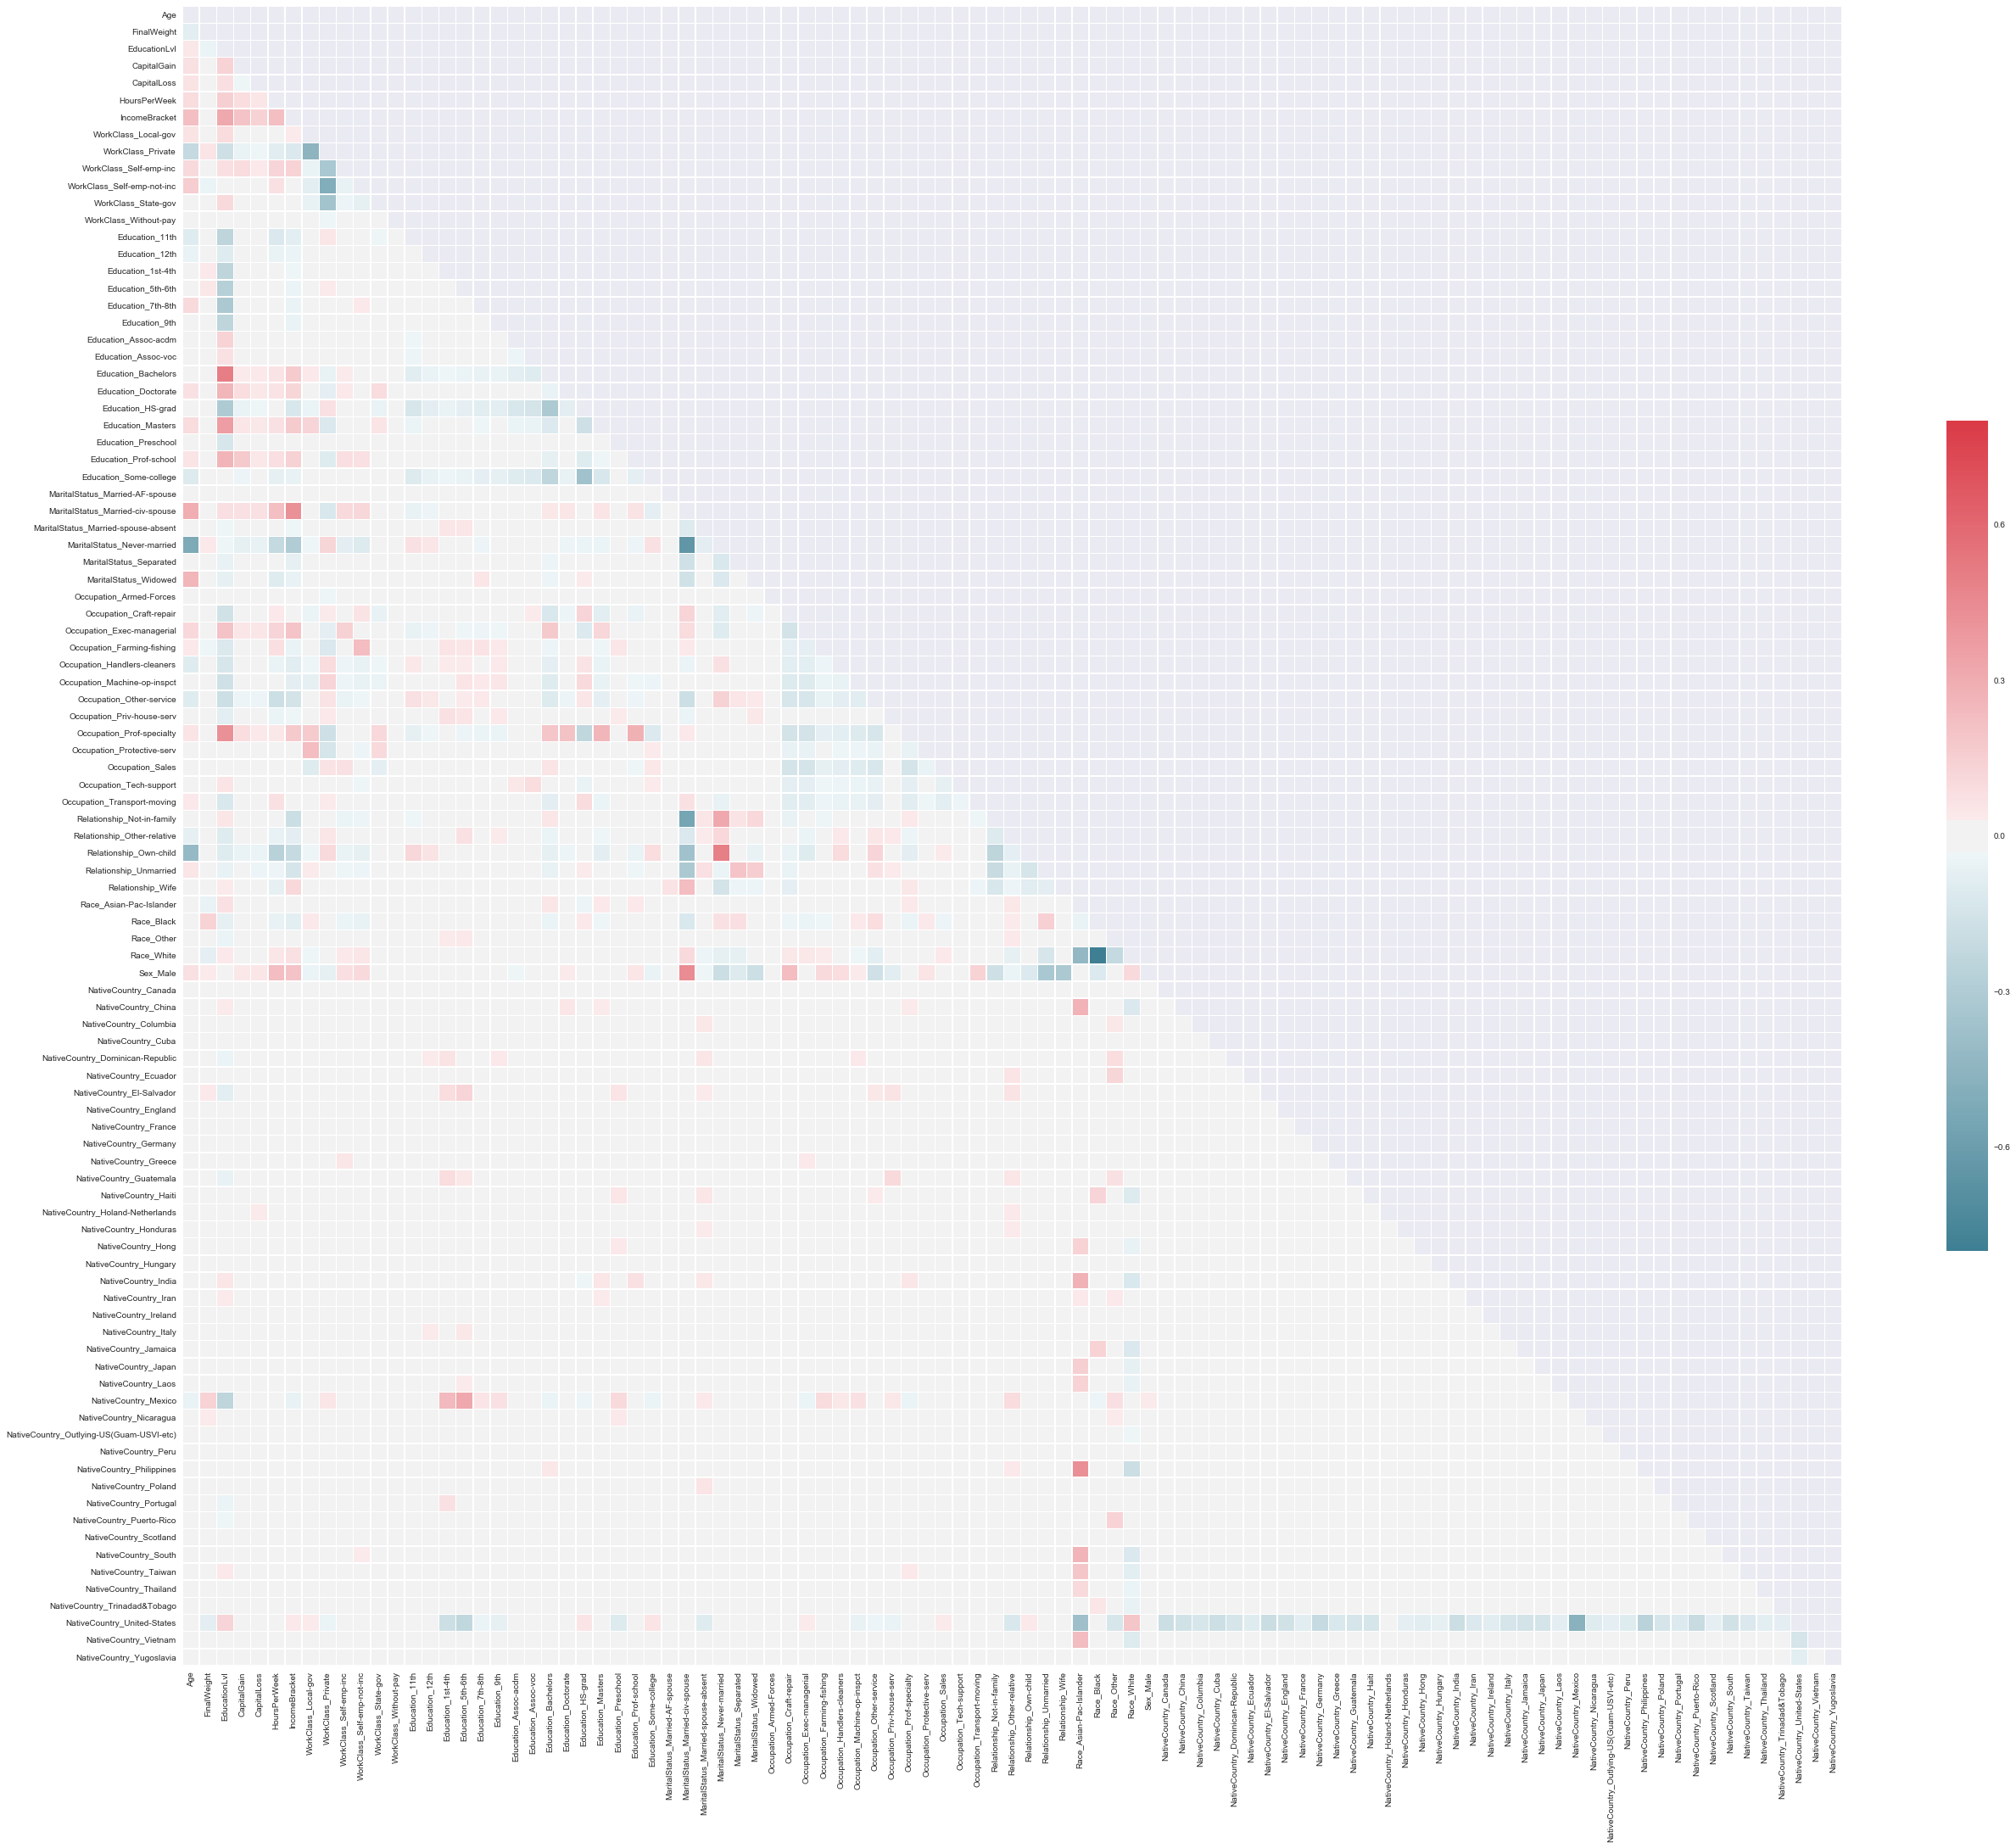

In [15]:
# Correlation plot
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(44, 36))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

The figure is too big to be clearly seen, but we can roughly see that some variables are strongly correlated to each other (correlation coefficient greater than 0.6 or less than -0.6), while most of the variables are not correlated. 

Now we take a closer look at the order of correlation coefficients between features and the target.

In [16]:
# Absolute values of correlation coefficients between features and the target
corr.IncomeBracket.abs().sort_values(ascending=False) # take absolute value because we only care the level of their correlation

IncomeBracket                               1.000000
MaritalStatus_Married-civ-spouse            0.419166
EducationLvl                                0.312981
MaritalStatus_Never-married                 0.298717
Age                                         0.221082
HoursPerWeek                                0.219825
Relationship_Own-child                      0.207789
Sex_Male                                    0.205977
CapitalGain                                 0.202783
Occupation_Exec-managerial                  0.196714
Relationship_Not-in-family                  0.182566
Occupation_Prof-specialty                   0.174239
Education_Bachelors                         0.165709
Education_Masters                           0.164141
Occupation_Other-service                    0.153757
CapitalLoss                                 0.143381
Relationship_Unmarried                      0.142751
Education_Prof-school                       0.140202
WorkClass_Self-emp-inc                      0.

The closer the absolute value of the coefficient is to 1, the closer the two variables are in a linear relationship. From the above list, we can say that marital status and education level are the two most related features to the target variable.

### 3. Feature Selection
In this section, we eliminate the redundant features by removing them or extracting new feature out of them.

First we remove the Education column because we have EducationLvl and we prefer quantitative data. We also remove the HoursPerWeek column as we found out before that it's not indicative of the target. (I actually tested the accuracies obtained with and without HoursPerWeek, they are the same for all models.)

In [17]:
training = training.drop(labels=['Education', 'HoursPerWeek'], axis=1)

We create a new column NetGain to replace the CapitalGain and CapitalLoss. NetGain contains information of both CapitalGain and CapitalLoss. We do this to reduce the dimensionality of the featrues.

In [18]:
net_gain = training['CapitalGain'] - training['CapitalLoss']
training.insert(loc=3, column='NetGain', value=net_gain)
training = training.drop(labels=['CapitalGain', 'CapitalLoss'], axis=1)
training

,Age,WorkClass,FinalWeight,NetGain,EducationLvl,MaritalStatus,Occupation,Relationship,Race,Sex,NativeCountry,IncomeBracket
0,42,State-gov,179151,0,10,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States,0
1,28,Private,68021,0,10,Never-married,Other-service,Not-in-family,White,Female,United-States,0
2,24,Private,233499,0,10,Married-civ-spouse,Transport-moving,Husband,White,Male,United-States,1
3,32,Self-emp-not-inc,168782,0,5,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States,0
4,55,Self-emp-not-inc,105582,2228,14,Married-civ-spouse,Sales,Husband,White,Male,United-States,0
5,35,Private,261241,-1741,9,Divorced,Transport-moving,Not-in-family,White,Male,United-States,0
6,51,Private,200576,0,13,Divorced,Adm-clerical,Not-in-family,White,Female,United-States,0
7,43,Self-emp-inc,175715,0,9,Never-married,Exec-managerial,Not-in-family,Black,Male,United-States,0
8,29,State-gov,188986,-1590,11,Never-married,Tech-support,Not-in-family,White,Female,United-States,0
10,35,Private,241998,4787,9,Never-married,Sales,Not-in-family,White,Male,United-States,2


We still have a great number of features after the above steps. So we run a decision tree model to get the feature importances and see if we can remove any irrelevant feature.

In [19]:
# Prepare training features and target
y_train = training['IncomeBracket']
X_train = pd.get_dummies(training, drop_first=True).drop(labels=['IncomeBracket'], axis=1)

In [20]:
# Train a Decision Tree model with 10-fold cross validation
parameters = {'max_depth':[4, 5, 6, 7, 8, 9, 10, 15, 20, 30, 40, 50, 100]} # maximum depths of the tree
dt = GridSearchCV(DecisionTreeClassifier(), parameters, cv=10, scoring='accuracy')
dt.fit(X_train, y_train)

feature_importances = pd.DataFrame(columns=['features', 'importances'])
feature_importances['features'] = X_train.columns
feature_importances['importances'] = dt.best_estimator_.feature_importances_
feature_importances[feature_importances['importances']<0.001] # get the features with small importances

,features,importances
4,WorkClass_Local-gov,0.000598
5,WorkClass_Private,0.000000
6,WorkClass_Self-emp-inc,0.000000
7,WorkClass_Self-emp-not-inc,0.000000
8,WorkClass_State-gov,0.000000
9,WorkClass_Without-pay,0.000000
10,MaritalStatus_Married-AF-spouse,0.000000
12,MaritalStatus_Married-spouse-absent,0.000000
13,MaritalStatus_Never-married,0.000000
14,MaritalStatus_Separated,0.000801


Some of the marital statuses are of low importance. The detailed status of a person might not be relevant to his/her income. We only care about if this person is married or not. So we change the MaritulStatus to be 0 where the person is unmarried and 1 where married.

In [21]:
dic = {"Married-civ-spouse": 1, "Divorced": 0, "Never-married": 0, "Separated": 1,
       "Widowed": 0, "Married-spouse-absent": 1, "Married-AF-spouse": 1}
training['MaritalStatus'] = training['MaritalStatus'].map(dic)
training

,Age,WorkClass,FinalWeight,NetGain,EducationLvl,MaritalStatus,Occupation,Relationship,Race,Sex,NativeCountry,IncomeBracket
0,42,State-gov,179151,0,10,1,Farming-fishing,Husband,White,Male,United-States,0
1,28,Private,68021,0,10,0,Other-service,Not-in-family,White,Female,United-States,0
2,24,Private,233499,0,10,1,Transport-moving,Husband,White,Male,United-States,1
3,32,Self-emp-not-inc,168782,0,5,1,Craft-repair,Husband,White,Male,United-States,0
4,55,Self-emp-not-inc,105582,2228,14,1,Sales,Husband,White,Male,United-States,0
5,35,Private,261241,-1741,9,0,Transport-moving,Not-in-family,White,Male,United-States,0
6,51,Private,200576,0,13,0,Adm-clerical,Not-in-family,White,Female,United-States,0
7,43,Self-emp-inc,175715,0,9,0,Exec-managerial,Not-in-family,Black,Male,United-States,0
8,29,State-gov,188986,-1590,11,0,Tech-support,Not-in-family,White,Female,United-States,0
10,35,Private,241998,4787,9,0,Sales,Not-in-family,White,Male,United-States,2


Also, a lot of the native countries are not regarded as important by the decision tree model. This is probably because the census was conducted in the US and most people's native country is the US (can be seen from the following graph).

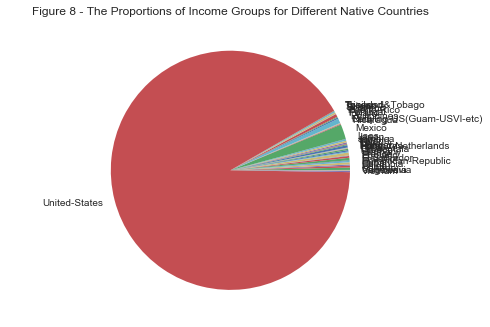

In [22]:
# Plot the proportion of each income bracket out of the survey population
counts = training.groupby(training.NativeCountry).size()
plt.axis('equal');
plt.pie(counts, labels=counts.index);
plt.title('Figure 8 - The Proportions of Income Groups for Different Native Countries')
plt.show()

Thus, we create change the NativeCountry column to indicate if the person was born in the US or not.

In [23]:
dic = {"United-States": 1}
training['NativeCountry'] = training['NativeCountry'].map(dic)
training['NativeCountry'].fillna(0, inplace=True)
training

,Age,WorkClass,FinalWeight,NetGain,EducationLvl,MaritalStatus,Occupation,Relationship,Race,Sex,NativeCountry,IncomeBracket
0,42,State-gov,179151,0,10,1,Farming-fishing,Husband,White,Male,1.0,0
1,28,Private,68021,0,10,0,Other-service,Not-in-family,White,Female,1.0,0
2,24,Private,233499,0,10,1,Transport-moving,Husband,White,Male,1.0,1
3,32,Self-emp-not-inc,168782,0,5,1,Craft-repair,Husband,White,Male,1.0,0
4,55,Self-emp-not-inc,105582,2228,14,1,Sales,Husband,White,Male,1.0,0
5,35,Private,261241,-1741,9,0,Transport-moving,Not-in-family,White,Male,1.0,0
6,51,Private,200576,0,13,0,Adm-clerical,Not-in-family,White,Female,1.0,0
7,43,Self-emp-inc,175715,0,9,0,Exec-managerial,Not-in-family,Black,Male,1.0,0
8,29,State-gov,188986,-1590,11,0,Tech-support,Not-in-family,White,Female,1.0,0
10,35,Private,241998,4787,9,0,Sales,Not-in-family,White,Male,1.0,2


In [24]:
# Prepare features
X_train = pd.get_dummies(training, drop_first=True).drop(labels=['IncomeBracket'], axis=1)
X_train

,Age,FinalWeight,NetGain,EducationLvl,MaritalStatus,NativeCountry,WorkClass_Local-gov,WorkClass_Private,WorkClass_Self-emp-inc,WorkClass_Self-emp-not-inc,...,Relationship_Not-in-family,Relationship_Other-relative,Relationship_Own-child,Relationship_Unmarried,Relationship_Wife,Race_Asian-Pac-Islander,Race_Black,Race_Other,Race_White,Sex_Male
0,42,179151,0,10,1,1.0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
1,28,68021,0,10,0,1.0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
2,24,233499,0,10,1,1.0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,1
3,32,168782,0,5,1,1.0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,1
4,55,105582,2228,14,1,1.0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,1
5,35,261241,-1741,9,0,1.0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,1
6,51,200576,0,13,0,1.0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
7,43,175715,0,9,0,1.0,0,0,1,0,...,1,0,0,0,0,0,1,0,0,1
8,29,188986,-1590,11,0,1.0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
10,35,241998,4787,9,0,1.0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,1


The features we keep for model training are Age, WorkClass, FinalWeight, EducationLvl, MaritalStatus (married or not), Occupation, Relationship, Race, Sex, NetGain and NativeCountry (US or not). We already explore how age, sex, education level and marital status are related to income. Occupation and work class are related as well because the kind of job a person does influences his/her salary. Net gain on investment can be related because income includes return on investments. Relationship and race can be related as well because a person's living environment now/as a child affect the human resources that are accessible to one.

### 4. Model Implementation & Testing
In this section, we train four models using different classifiers with hyperparameter tuning. We compare the accuracies across the folds for each model. Then we test the best models with the testing set.

We select the model with the highest accuracy. We are interested in accuracy because we want to know the ratio of the correct classifications.

First we prepare the testing set for use.

In [25]:
def clean(df):
    '''
    Cleans the data
    '''
    # Remove empty values
    df = df[~df.isnull().any(axis=1)]
    
    df_y = df['IncomeBracket']
    df_X = df.drop(labels=['IncomeBracket'], axis=1)
    
    # Convert the target into numerical
    dic1 = {"<50K": 0, "50-100K": 1, ">100K": 2}
    df_y = df_y.map(dic1)
    
    # Remove Education and HoursPerWeek
    df_X = df_X.drop(labels=['Education', 'HoursPerWeek'], axis=1)
    # Create NetGain and remove CapitalGian and CapitalLoss
    net_gain = df_X['CapitalGain'] - df_X['CapitalLoss']
    df_X.insert(loc=3, column='NetGain', value=net_gain)
    df_X = df_X.drop(labels=['CapitalGain', 'CapitalLoss'], axis=1)
    # Convert MaritalStatus
    dic2 = {"Married-civ-spouse": 1, "Divorced": 0, "Never-married": 0, "Separated": 1,
       "Widowed": 0, "Married-spouse-absent": 1, "Married-AF-spouse": 1}
    df_X['MaritalStatus'] = df_X['MaritalStatus'].map(dic2)
    # 
    dic3 = {"United-States": 1}
    df_X['NativeCountry'] = df_X['NativeCountry'].map(dic3)
    df_X['NativeCountry'].fillna(0, inplace=True)
    
    #Convert the feature variables into numerical
    df_X = pd.get_dummies(df_X, drop_first=True)
    
    return df_X, df_y

In [26]:
def fix_columns(columns, df): 
    '''
    Fix the columns to make sure df has the same number of columns as the model requires
    '''
    # Add missing dummy columns
    missing_cols = set(columns) - set(df.columns)
    for c in missing_cols:
        df[c] = 0

    # Make sure we have all the columns we need
    assert(set(columns) - set(df.columns) == set())

    extra_cols = set(df.columns) - set(columns)
    if extra_cols:
        print("extra columns:", extra_cols)

    df = df[columns]
    return df

In [27]:
testing = pd.read_csv('income-testing.csv')
X_test, y_test = clean(testing)
X_test = fix_columns(X_train.columns, X_test)

#### Logistic Regression
Logistice Regression is the most prevalent algorithm for classification problems. We use it here because it's relatively fast to train. We can quickly get a sense of the training and testing processes. However, it might not work as well on categorical data as Decision Tree does. We will have to explore other classifiers.
#### Training

In [28]:
parameters = {'C': [0.01, 0.1, 1, 10, 100]}
lg = GridSearchCV(LogisticRegression(multi_class='multinomial', solver='lbfgs'), # multi-class classification as the target contains three classes
                  parameters, cv=10, scoring='accuracy') # select the parameter sets with the highest accuracy
lg.fit(X_train, y_train)
lg.cv_results_

{'mean_fit_time': array([ 0.30048976,  0.3148489 ,  0.28535805,  0.28092141,  0.28109848]),
 'mean_score_time': array([ 0.00064499,  0.00069411,  0.00063632,  0.00059047,  0.00059941]),
 'mean_test_score': array([ 0.76878255,  0.76878255,  0.76878255,  0.76878255,  0.76878255]),
 'mean_train_score': array([ 0.76906213,  0.76906213,  0.76906213,  0.76906213,  0.76906213]),
 'param_C': masked_array(data = [0.01 0.1 1 10 100],
              mask = [False False False False False],
        fill_value = ?),
 'params': [{'C': 0.01}, {'C': 0.1}, {'C': 1}, {'C': 10}, {'C': 100}],
 'rank_test_score': array([1, 1, 1, 1, 1], dtype=int32),
 'split0_test_score': array([ 0.76356418,  0.76356418,  0.76356418,  0.76356418,  0.76356418]),
 'split0_train_score': array([ 0.76985334,  0.76985334,  0.76985334,  0.76985334,  0.76985334]),
 'split1_test_score': array([ 0.76654898,  0.76654898,  0.76654898,  0.76654898,  0.76654898]),
 'split1_train_score': array([ 0.76942319,  0.76942319,  0.76942319,  0.7694

The accuracies of different folds (split_test_score) are close to each other. They fluctuate a bit because different data is used in the training and validation sets.

In [29]:
print("Best score: %0.3f" % lg.best_score_)
print("Best set of parameters found: ", lg.best_params_)
print()
print("Scores on training set:")
means = lg.cv_results_['mean_test_score']
stds = lg.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, lg.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params)) # 2 standard deviation -> roughly 95%

Best score: 0.769
Best set of parameters found:  {'C': 0.01}

Scores on training set:
0.769 (+/-0.007) for {'C': 0.01}
0.769 (+/-0.007) for {'C': 0.1}
0.769 (+/-0.007) for {'C': 1}
0.769 (+/-0.007) for {'C': 10}
0.769 (+/-0.007) for {'C': 100}


The mean accuracies of models with different Cs are roughly the same, with similar standard deviations. The highest accuracy obtained is 76.9% with C being 0.01, which is not very good. 
#### Testing

In [30]:
predictions = lg.best_estimator_.predict(X_test)
ACC = accuracy_score(y_test,predictions)
print("Accuracy: ", ACC)
print()
print('Confusion matrix:')
print(confusion_matrix(y_test, predictions))
print()
print('Metrics:')
print(classification_report(y_test, predictions))

Accuracy:  0.765543468648

Confusion matrix:
[[8322   46    0]
 [1564  334    0]
 [ 879  162    0]]

Metrics:
             precision    recall  f1-score   support

          0       0.77      0.99      0.87      8368
          1       0.62      0.18      0.27      1898
          2       0.00      0.00      0.00      1041

avg / total       0.68      0.77      0.69     11307



/Users/angela/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


The accuracy of the logistic regression model on the testing set is about 76.6%. It's not a satisfying accuracy. Moreover, the model fails to classify any instance of class 2 as shown in the confusion matrix. This results in 0 precision and 0 recall for class 2 as shown in the metrics table. The model still achieves a relatively okay score because there aren't many instances of class 2. Even if it classifies everything as non-class 2, it still gets a large number of True Negatives, which results in a not-so-bad accuracy.

#### kNN
We try kNN because if two individuals are similar in terms of the selected features (i.e. closer in distance), they are likely to fall into the same income bracket. The drawback is that distance might not makes sense for some of the features, for example, race. Also, kNN doesn't know which attributes are important, i.e. each attribute weighs the same to the total distance.
#### Training

In [31]:
parameters = {'n_neighbors': np.arange(1, 11), # k values
          'p': [1, 2]} # Manhattan distance and Euclidian distance
knn = GridSearchCV(KNeighborsClassifier(), parameters, cv=10, scoring='accuracy')
knn.fit(X_train, y_train)
knn.cv_results_

{'mean_fit_time': array([ 0.09152663,  0.09240239,  0.08986037,  0.09027529,  0.09033637,
         0.09119725,  0.09094267,  0.09009762,  0.08978817,  0.0898572 ,
         0.09061642,  0.08914146,  0.090993  ,  0.09100044,  0.08951862,
         0.08996449,  0.08993704,  0.09132657,  0.08966286,  0.09927981]),
 'mean_score_time': array([ 0.03755157,  0.04442825,  0.03740945,  0.04198244,  0.03843069,
         0.0435529 ,  0.0388067 ,  0.04556031,  0.03911896,  0.04501729,
         0.04032531,  0.04603243,  0.04178391,  0.04694674,  0.04100244,
         0.04736214,  0.04194734,  0.04882951,  0.04308419,  0.05790055]),
 'mean_test_score': array([ 0.66412113,  0.66120773,  0.74724111,  0.74459257,  0.7291869 ,
         0.72755363,  0.75209676,  0.74878609,  0.75452459,  0.75156705,
         0.75924781,  0.75730555,  0.75982167,  0.75889468,  0.76445661,
         0.76299991,  0.76405933,  0.76339719,  0.76414761,  0.76414761]),
 'mean_train_score': array([ 0.99964196,  0.99964196,  0.839675

The training accuracy (split_train_score) is nearly 100% when k = 1, because the first nearest neighbour of one point in the training process is itself. So the classification will always be correct. When k increases, the training accuracy goes down.

The validation accuracy (split_test_score) is low when k = 1 because in validation process, the nearest neighbour of one point is not itself anymore. Also, the true class of the point is often not the same as its nearest neighbour.

In [32]:
print("Best score: %0.3f" % knn.best_score_)
print("Best set of parameters found: ", knn.best_params_)
print()
print("Scores on training set:")
means = knn.cv_results_['mean_test_score']
stds = knn.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, knn.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))

Best score: 0.764
Best set of parameters found:  {'n_neighbors': 8, 'p': 1}

Scores on training set:
0.664 (+/-0.015) for {'n_neighbors': 1, 'p': 1}
0.661 (+/-0.016) for {'n_neighbors': 1, 'p': 2}
0.747 (+/-0.009) for {'n_neighbors': 2, 'p': 1}
0.745 (+/-0.013) for {'n_neighbors': 2, 'p': 2}
0.729 (+/-0.008) for {'n_neighbors': 3, 'p': 1}
0.728 (+/-0.010) for {'n_neighbors': 3, 'p': 2}
0.752 (+/-0.009) for {'n_neighbors': 4, 'p': 1}
0.749 (+/-0.013) for {'n_neighbors': 4, 'p': 2}
0.755 (+/-0.010) for {'n_neighbors': 5, 'p': 1}
0.752 (+/-0.011) for {'n_neighbors': 5, 'p': 2}
0.759 (+/-0.010) for {'n_neighbors': 6, 'p': 1}
0.757 (+/-0.010) for {'n_neighbors': 6, 'p': 2}
0.760 (+/-0.007) for {'n_neighbors': 7, 'p': 1}
0.759 (+/-0.008) for {'n_neighbors': 7, 'p': 2}
0.764 (+/-0.008) for {'n_neighbors': 8, 'p': 1}
0.763 (+/-0.009) for {'n_neighbors': 8, 'p': 2}
0.764 (+/-0.006) for {'n_neighbors': 9, 'p': 1}
0.763 (+/-0.007) for {'n_neighbors': 9, 'p': 2}
0.764 (+/-0.007) for {'n_neighbors'

The mean accuracies of models with different k values and different distance measurements vary. The best model is 8-nearest neighbour with Manhattan distance. This model gives an accuracy of 76.4%.
#### Testing

In [33]:
predictions = knn.best_estimator_.predict(X_test)
ACC = accuracy_score(y_test,predictions)
print("Accuracy: ", ACC)
print()
print('Confusion matrix:')
print(confusion_matrix(y_test, predictions))
print()
print('Metrics:')
print(classification_report(y_test, predictions))

Accuracy:  0.761740514725

Confusion matrix:
[[8204  147   17]
 [1464  388   46]
 [ 822  198   21]]

Metrics:
             precision    recall  f1-score   support

          0       0.78      0.98      0.87      8368
          1       0.53      0.20      0.29      1898
          2       0.25      0.02      0.04      1041

avg / total       0.69      0.76      0.70     11307



The accuracy of our best knn model on the testing set is 76.2%. This number is even lower than that of the Logistic Regression model. However, the good side is that it's not totally failing on classifying instances of class 2 (although it's not good at it).

#### Decision Tree
Decision Trees can handle dicrete data, which is desired in our problem. It can also filter out irrelevant attributes by checking if the information gain is 0. Disadvantages include that it is greedy and it can overfit. However, we can reduce the impact of overfitting by using ensembled tree methods, which we explore later.
#### Training

In [34]:
parameters = {'max_depth':[4, 5, 6, 7, 8, 9, 10, 15, 20, 30, 40, 50, 100]}
dt = GridSearchCV(DecisionTreeClassifier(), parameters, cv=10, scoring='accuracy')
dt.fit(X_train, y_train)
dt.cv_results_

{'mean_fit_time': array([ 0.03979731,  0.04393609,  0.04938018,  0.05505385,  0.05970323,
         0.06466508,  0.07065029,  0.09111722,  0.10362885,  0.11207681,
         0.11498642,  0.11493216,  0.11477017]),
 'mean_score_time': array([ 0.00092034,  0.00109127,  0.00100942,  0.00096703,  0.00098636,
         0.00093265,  0.00104258,  0.00116525,  0.00130694,  0.0014672 ,
         0.00165348,  0.00171814,  0.00157013]),
 'mean_test_score': array([ 0.78913216,  0.79562108,  0.7932374 ,  0.79398782,  0.79376711,
         0.79200141,  0.79138342,  0.77747859,  0.75907125,  0.73850093,
         0.73205615,  0.72958418,  0.73245343]),
 'mean_train_score': array([ 0.79304608,  0.7982598 ,  0.80155087,  0.80537653,  0.80919238,
         0.81456791,  0.8207086 ,  0.86000509,  0.90705585,  0.97324482,
         0.99667948,  0.99960762,  0.99964196]),
 'param_max_depth': masked_array(data = [4 5 6 7 8 9 10 15 20 30 40 50 100],
              mask = [False False False False False False False Fals

Decision Trees are very likely to overfit. As we can see, the training score (split_train_score) increases to nearly 100% when the max_depth of the tree is more than 40. However, the calidation score (split_test_score) decreases when the max_depth is more than 6.

In [35]:
print("Best score: %0.3f" % dt.best_score_)
print("Best set of parameters found: ", dt.best_params_)
print()
print("Scores on training set:")
means = dt.cv_results_['mean_test_score']
stds = dt.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, dt.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))

Best score: 0.796
Best set of parameters found:  {'max_depth': 5}

Scores on training set:
0.789 (+/-0.010) for {'max_depth': 4}
0.796 (+/-0.006) for {'max_depth': 5}
0.793 (+/-0.006) for {'max_depth': 6}
0.794 (+/-0.007) for {'max_depth': 7}
0.794 (+/-0.007) for {'max_depth': 8}
0.792 (+/-0.009) for {'max_depth': 9}
0.791 (+/-0.010) for {'max_depth': 10}
0.777 (+/-0.016) for {'max_depth': 15}
0.759 (+/-0.016) for {'max_depth': 20}
0.739 (+/-0.015) for {'max_depth': 30}
0.732 (+/-0.016) for {'max_depth': 40}
0.730 (+/-0.019) for {'max_depth': 50}
0.732 (+/-0.017) for {'max_depth': 100}


By looking at the mean accuraies of the models with different max_depth values, we can also conclude that the tree overfits the training data when the max_depth value is more than 5. The best accuracy we get is 79.6%, which is much higher than the previous two classifiers we explored.
#### Testing

In [36]:
predictions = dt.best_estimator_.predict(X_test)
ACC = accuracy_score(y_test,predictions)
print("Accuracy: ", ACC)
print()
print('Confusion matrix:')
print(confusion_matrix(y_test, predictions))
print()
print('Metrics:')
print(classification_report(y_test, predictions))

Accuracy:  0.785884850093

Confusion matrix:
[[8188  176    4]
 [1169  672   57]
 [ 666  349   26]]

Metrics:
             precision    recall  f1-score   support

          0       0.82      0.98      0.89      8368
          1       0.56      0.35      0.43      1898
          2       0.30      0.02      0.05      1041

avg / total       0.73      0.79      0.74     11307



The testing accuracy is slightly lower than the training score. The model is still very bad on class 2.

Now wo look at some ensembled tree methods in the hope of getting a better result.

#### Random Forest
#### Training

In [37]:
parameters = {'n_estimators': [100, 500]}
rf = GridSearchCV(RandomForestClassifier(), 
                  parameters, cv=10, scoring='accuracy')
rf.fit(X_train, y_train)
rf.cv_results_

{'mean_fit_time': array([ 1.70627084,  8.34864073]),
 'mean_score_time': array([ 0.0674114 ,  0.32833931]),
 'mean_test_score': array([ 0.77968571,  0.78034784]),
 'mean_train_score': array([ 0.99960762,  0.99964196]),
 'param_n_estimators': masked_array(data = [100 500],
              mask = [False False],
        fill_value = ?),
 'params': [{'n_estimators': 100}, {'n_estimators': 500}],
 'rank_test_score': array([2, 1], dtype=int32),
 'split0_test_score': array([ 0.76621085,  0.76929863]),
 'split0_train_score': array([ 0.99970569,  0.99970569]),
 'split1_test_score': array([ 0.79126214,  0.79126214]),
 'split1_train_score': array([ 0.99941142,  0.99955856]),
 'split2_test_score': array([ 0.78067079,  0.77669903]),
 'split2_train_score': array([ 0.99960761,  0.99965666]),
 'split3_test_score': array([ 0.77890556,  0.7819947 ]),
 'split3_train_score': array([ 0.99965666,  0.99965666]),
 'split4_test_score': array([ 0.78773169,  0.78640777]),
 'split4_train_score': array([ 0.99955856,

In [38]:
print("Best score: %0.3f" % rf.best_score_)
print("Best set of parameters found: ", rf.best_params_)
print()
print("Scores on training set:")
means = rf.cv_results_['mean_test_score']
stds = rf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, rf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))

Best score: 0.780
Best set of parameters found:  {'n_estimators': 500}

Scores on training set:
0.780 (+/-0.019) for {'n_estimators': 100}
0.780 (+/-0.017) for {'n_estimators': 500}


The best accuracy of our Random Forest model is no better than the Decision Tree model. This is probably because the trees in the Random Forest overfit and the number of trees are not large enough. We are not trying a larger number of trees here because it takes too long to converge.
#### Testing

In [39]:
predictions = rf.best_estimator_.predict(X_test)
ACC = accuracy_score(y_test,predictions)
print("Accuracy: ", ACC)
print()
print('Confusion matrix:')
print(confusion_matrix(y_test, predictions))
print()
print('Metrics:')
print(classification_report(y_test, predictions))

Accuracy:  0.769611744937

Confusion matrix:
[[7784  446  138]
 [ 871  805  222]
 [ 461  467  113]]

Metrics:
             precision    recall  f1-score   support

          0       0.85      0.93      0.89      8368
          1       0.47      0.42      0.45      1898
          2       0.24      0.11      0.15      1041

avg / total       0.73      0.77      0.75     11307



The ability of this Random Forest model to classify instances of class 2 is slightly better than the Decision Tree model. Its accuracy on the testing set is about 77.0%.

#### Gradient Boosting

In [40]:
parameters = {'n_estimators':range(40,101,10)}
gb = GridSearchCV(GradientBoostingClassifier(), 
                  parameters, cv=10, scoring='accuracy')
gb.fit(X_train, y_train)
gb.cv_results_

{'mean_fit_time': array([ 2.48031495,  2.98545933,  3.50752809,  3.97074943,  4.53214309,
         5.03131444,  5.48978128]),
 'mean_score_time': array([ 0.00464544,  0.00525362,  0.00604136,  0.00695133,  0.00731893,
         0.00776606,  0.0089668 ]),
 'mean_test_score': array([ 0.80352256,  0.80489097,  0.8058621 ,  0.80590624,  0.80608281,
         0.80692151,  0.80696566]),
 'mean_train_score': array([ 0.80723541,  0.80920219,  0.81101201,  0.81232158,  0.81369489,
         0.81482297,  0.81600501]),
 'param_n_estimators': masked_array(data = [40 50 60 70 80 90 100],
              mask = [False False False False False False False],
        fill_value = ?),
 'params': [{'n_estimators': 40},
  {'n_estimators': 50},
  {'n_estimators': 60},
  {'n_estimators': 70},
  {'n_estimators': 80},
  {'n_estimators': 90},
  {'n_estimators': 100}],
 'rank_test_score': array([7, 6, 5, 4, 3, 2, 1], dtype=int32),
 'split0_test_score': array([ 0.80458756,  0.80502867,  0.8059109 ,  0.8059109 ,  0.806

In [41]:
print("Best score: %0.3f" % gb.best_score_)
print("Best set of parameters found: ", gb.best_params_)
print()
print("Scores on training set:")
means = gb.cv_results_['mean_test_score']
stds = gb.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, gb.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))

Best score: 0.807
Best set of parameters found:  {'n_estimators': 100}

Scores on training set:
0.804 (+/-0.006) for {'n_estimators': 40}
0.805 (+/-0.006) for {'n_estimators': 50}
0.806 (+/-0.006) for {'n_estimators': 60}
0.806 (+/-0.006) for {'n_estimators': 70}
0.806 (+/-0.006) for {'n_estimators': 80}
0.807 (+/-0.007) for {'n_estimators': 90}
0.807 (+/-0.007) for {'n_estimators': 100}


With Gradient Boosting, we are able to get a better result than the Decision Tree model. When the number of estimators increase, the accuracy generally increases. Becasue Gradient Boosting improves the model every iteration by adding weak learners that reduces the error. The best acuracy is 80.7%. 
#### Testing

In [42]:
predictions = gb.best_estimator_.predict(X_test)
ACC = accuracy_score(y_test,predictions)
print("Accuracy: ", ACC)
print()
print('Confusion matrix:')
print(confusion_matrix(y_test, predictions))
print()
print('Metrics:')
print(classification_report(y_test, predictions))

Accuracy:  0.798797205271

Confusion matrix:
[[8037  328    3]
 [ 896  984   18]
 [ 496  534   11]]

Metrics:
             precision    recall  f1-score   support

          0       0.85      0.96      0.90      8368
          1       0.53      0.52      0.53      1898
          2       0.34      0.01      0.02      1041

avg / total       0.75      0.80      0.76     11307



The best Gradient Boosting model (100 estimators) has an accuracy of nearly 80.0% on the testing set, which is the best model we have up to now.